In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import data
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [7]:
#head of data
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
#missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
#shape
df.shape

(41188, 21)

In [3]:
#data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
#numeric columns
numerics = list(df.select_dtypes(exclude=['object']))
numerics

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [12]:
#factor columns
factors = list(df.select_dtypes(include=['object']))
factors

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

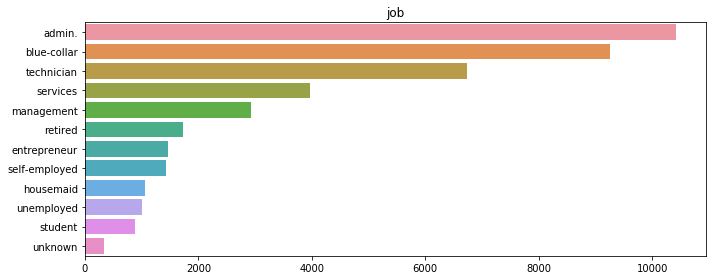

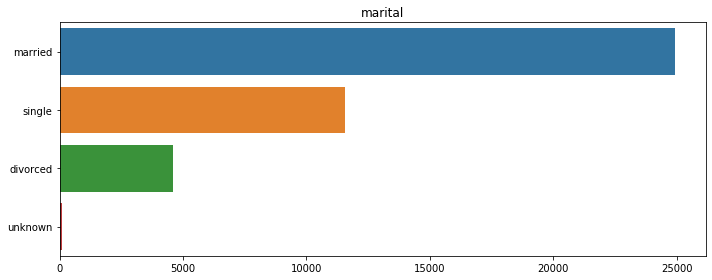

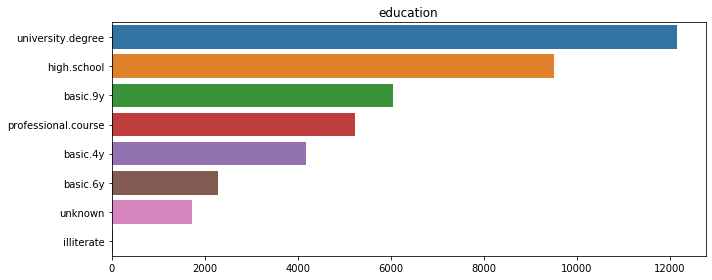

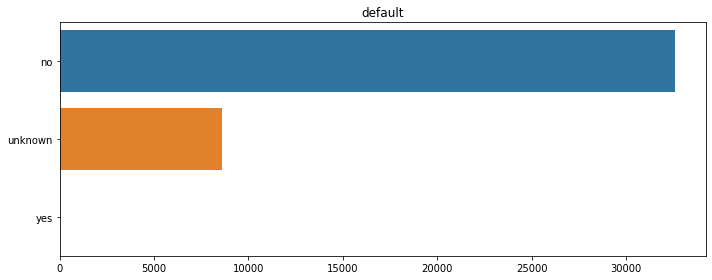

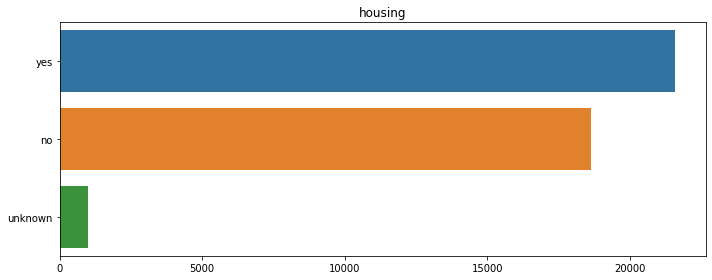

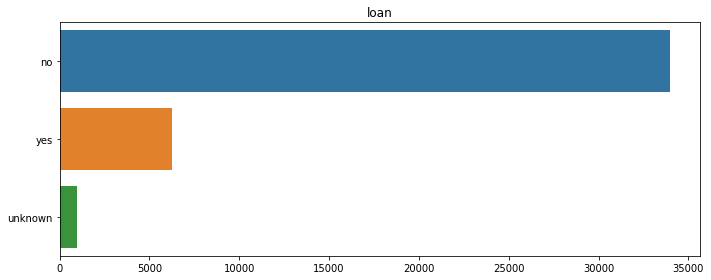

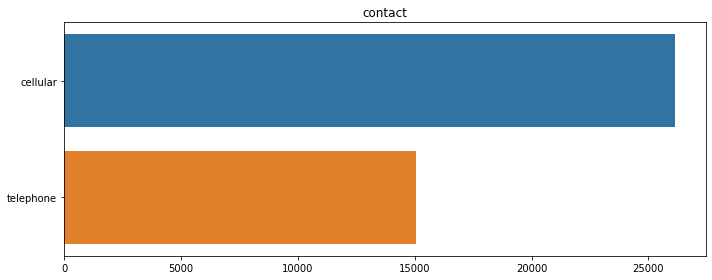

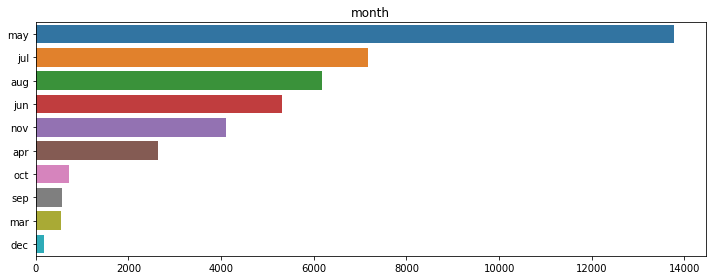

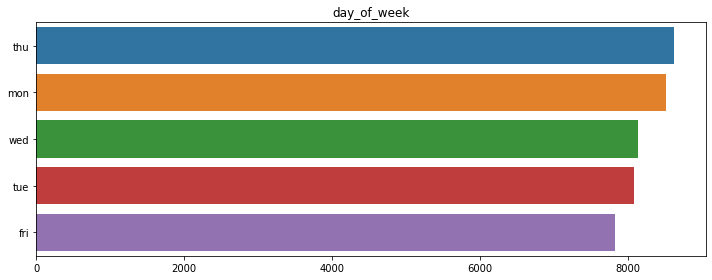

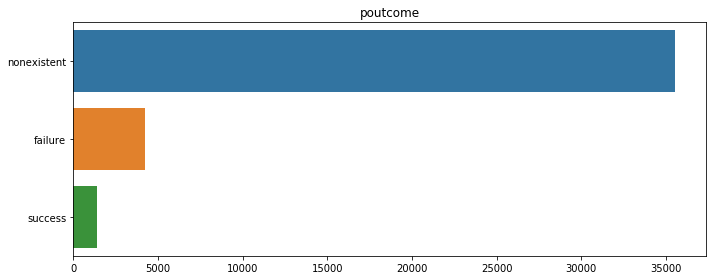

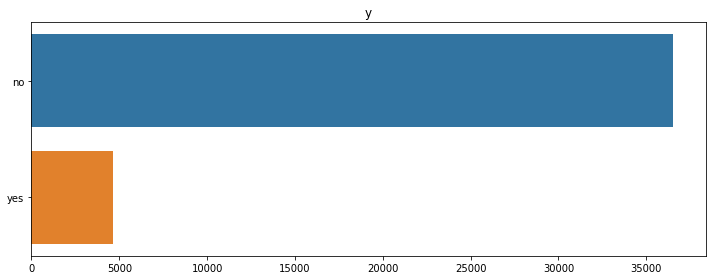

In [13]:
#count of all categorical variables
for col in factors:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

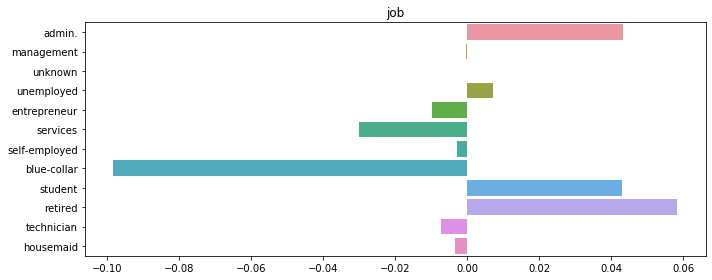

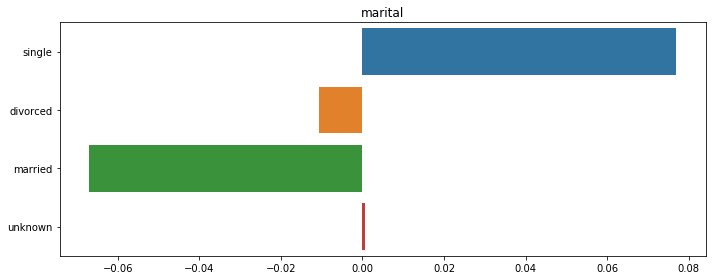

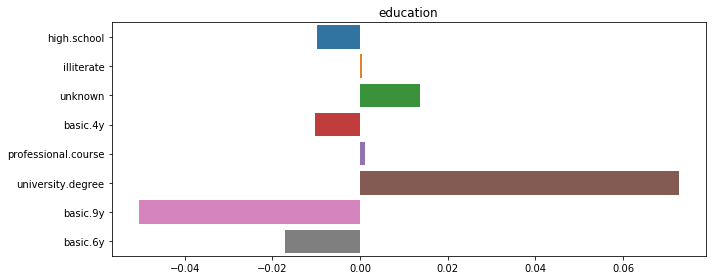

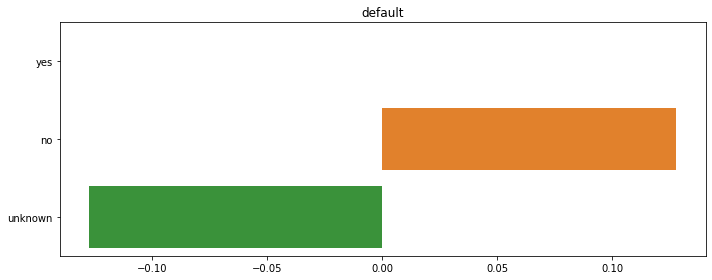

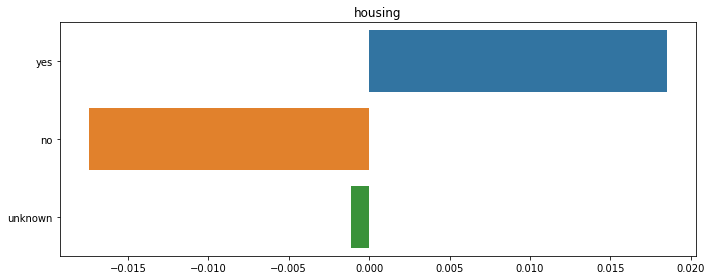

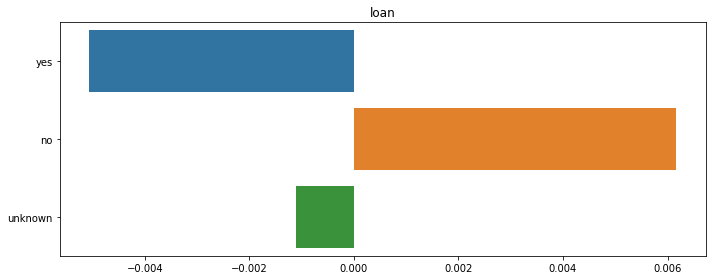

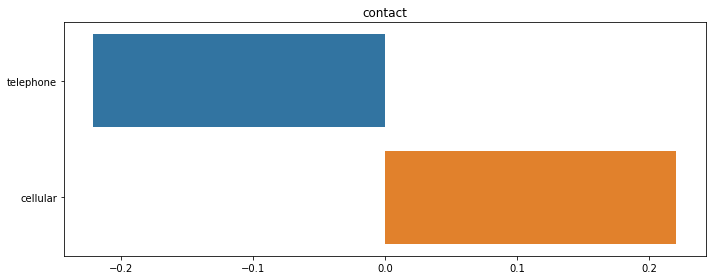

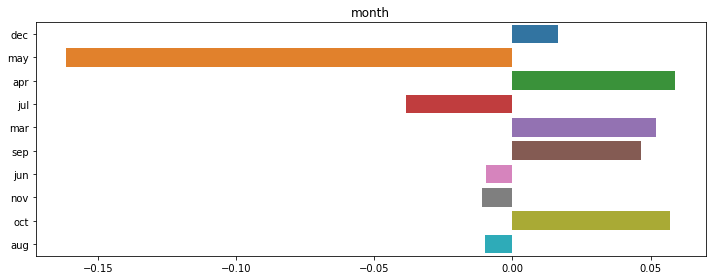

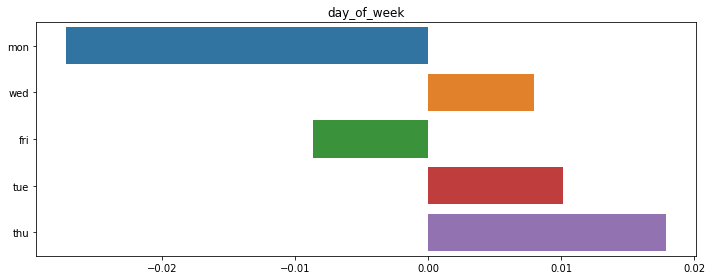

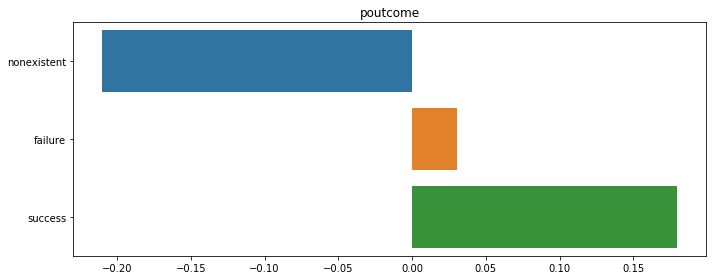

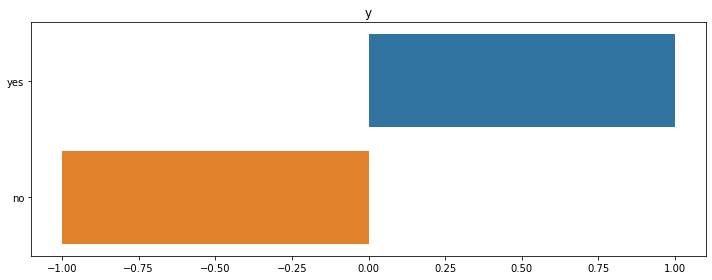

In [15]:
#count based on term deposit
for col in factors:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [62]:
#ensure the values of object are coherent
df.default.replace('unknown','no',inplace=True)
df['default'] = df.default.replace('unknown',df.default.mode([0]))
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])
df['y'].replace({'no':0,'yes':1},inplace=True)


In [65]:
#ensure the values of age education, job and pdays are coherent
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.education.replace('unknown','high.school',inplace = True)
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])



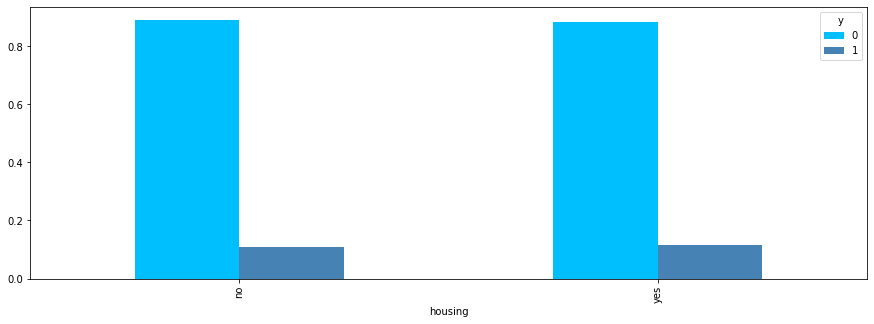

In [41]:
#Housing and deposit
draw_data = pd.crosstab(df.housing, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', color=['deepskyblue','steelblue'],
                                                           grid=False, figsize=(15, 5))
plt.show()

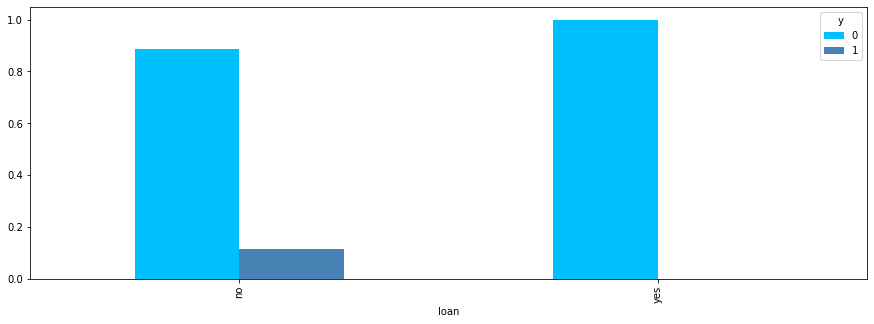

In [42]:
#loan and deposit
draw_data = pd.crosstab(df.loan, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', color=['deepskyblue','steelblue'],grid=False, 
                                                           figsize=(15, 5))
plt.show()

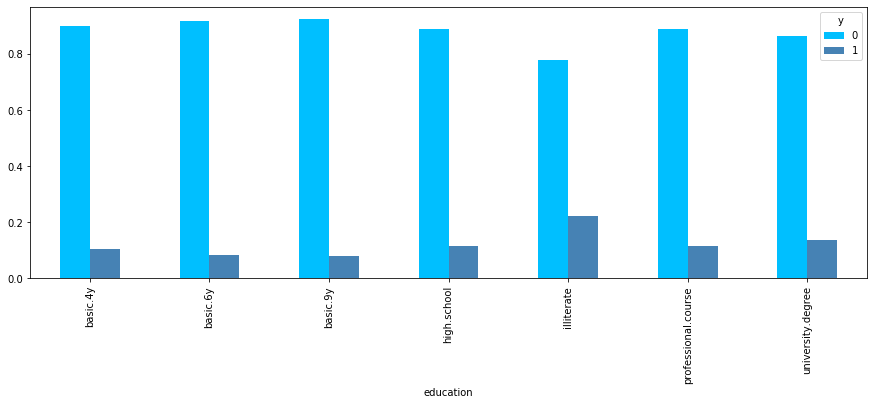

In [66]:
#education and deposit
draw_data = pd.crosstab(df.education, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', color=['deepskyblue','steelblue'],grid=False, 
                                                           figsize=(15, 5))
plt.show()

In [53]:
#convert to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

Text(0.5, 1.0, 'The Relationship between the Number and Duration of Calls')

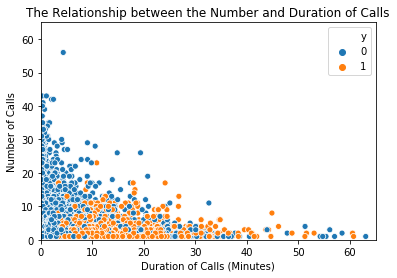

In [54]:
#Duration and number of calls
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')

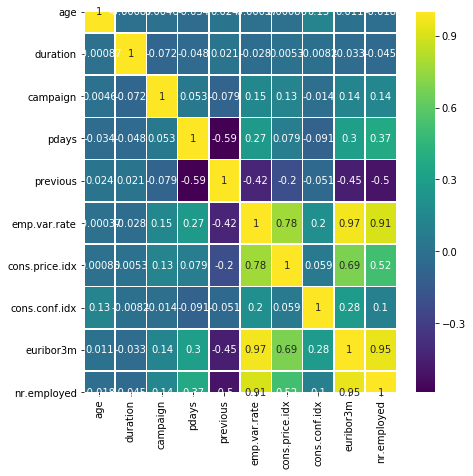

In [8]:
#correlation
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [67]:
#modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics

In [69]:
#splitting dataset while encoding the categorical variables
labelenc = LabelEncoder()
df[factors] = df[factors].apply(LabelEncoder().fit_transform)

X = df.drop(['y','duration'],1)
y = df['y']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

In [70]:
#initializing logistic regression
Banklogit=LogisticRegression()

#Fitting on data
Banklogit.fit(X_train, y_train)

#Scoring the model on train data
acctrainL=Banklogit.score(X_train, y_train)
print("Training accuracy: %.2f " % acctrainL)

#Scoring the model on test_data
acctestL=Banklogit.score(X_test, y_test)
print("Testing accuracy: %.2f " % acctestL)

y_pred = Banklogit.predict(X_test)

C:\Users\Anthonia Evbuomwan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy: 0.90 
Testing accuracy: 0.90 


In [72]:
#precision recall F1 accuracy
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

generate_model_report(y_test,y_pred)

Accuracy =  0.8993283159342883
Precision =  0.6894736842105263
Recall =  0.18876080691642652
F1 Score =  0.29638009049773756


In [73]:
#initializing random forest
Bankrf =RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
Bankrf.fit(X_train, y_train)

#Scoring the model on train data
acctrainr=Bankrf.score(X_train, y_train)
print("Training accuracy: %.2f " % acctrainr)

#Scoring the model on test_data
acctestr=Bankrf.score(X_test, y_test)
print("Testing accuracy: %.2f " % acctestr)

y_pred = Bankrf.predict(X_test)

Training accuracy: 0.90 
Testing accuracy: 0.90 


In [74]:
generate_model_report(y_test,y_pred)

Accuracy =  0.8996520190984867
Precision =  0.7021857923497268
Recall =  0.1851585014409222
F1 Score =  0.29304446978335236


In [76]:
Metric_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score"]
Results = pd.DataFrame(columns=Metric_cols)

In [9]:
data = [['Logit','Accuracy',90],['Logit','Precision',68.9],['Logit','Recall',18.9],['Logit','F1 Score',29.6],
        ['Rf','Accuracy',90],['Rf','Precision',70.2],['Rf','Recall',18.5],['Rf','F1 Score',29.3]]
resultsTable = pd.DataFrame(data,columns=['Classifier','Metric','Value'])
print (resultsTable)

  Classifier     Metric  Value
0      Logit   Accuracy   90.0
1      Logit  Precision   68.9
2      Logit     Recall   18.9
3      Logit   F1 Score   29.6
4         Rf   Accuracy   90.0
5         Rf  Precision   70.2
6         Rf     Recall   18.5
7         Rf   F1 Score   29.3
